In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings
warnings.filterwarnings('ignore')

In [44]:
df =pd.read_csv('C:/Users/pramod makwana/Desktop/new project/notebook/data/stud.csv')

In [45]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [46]:
df.shape

(1000, 8)

In [47]:
df.isna().sum()

#There is no missing value in data set

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [48]:
df.duplicated().sum()

# There is no dupicate in data set


0

In [49]:
# check Null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [50]:
# checking the number and values of each coloun
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [51]:
# check statistic of data set
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [52]:
print("categories in 'gender' variable:    ",end= " ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end= " ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ", end= " ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end= " ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ", end=" ")
print(df['test_preparation_course'].unique())

categories in 'gender' variable:     ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [53]:
# define numerical and categorical feature
numeric_feature=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype == 'O']

# print cloumns
print('we have {} numerical feature : {}'.format (len(numeric_feature),numeric_feature))
print('we have {} categorical feature : {}'.format(len(categorical_feature),categorical_feature))

we have 3 numerical feature : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical feature : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [54]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [55]:
# Adding columns for "Total score " and "Average"

df['total score']=df['math_score'] + df['reading_score'] + df['writing_score']
df['average']=df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [56]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full =df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()


print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in writing: {writing_full}')
print(f'Number of students with full marks in reading: {reading_full}')


Number of students with full marks in Maths: 7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17


In [57]:
reading_less_20 = df[df['reading_score'] <=20]['average'].count()
writing_less_20 = df[df['writing_score'] <=20]['average'].count()
math_less_20=df[df['math_score']<=20]['average'].count()

print (f'Number of students with less than 20 marks in in reading: {reading_less_20}')
print(f'Numeber of students with less than 20 marks in writing: {writing_less_20}')
print(f'Numebr of students with less than 20 makrs in maths: {math_less_20}')

Number of students with less than 20 marks in in reading: 1
Numeber of students with less than 20 marks in writing: 3
Numebr of students with less than 20 makrs in maths: 4


INSIGHTS 

# From above values we get students have performed the worst in Maths 
# Best Performance is in reading section

# Exploring the data

In [86]:
df1=df

TypeError: 'int' object is not callable

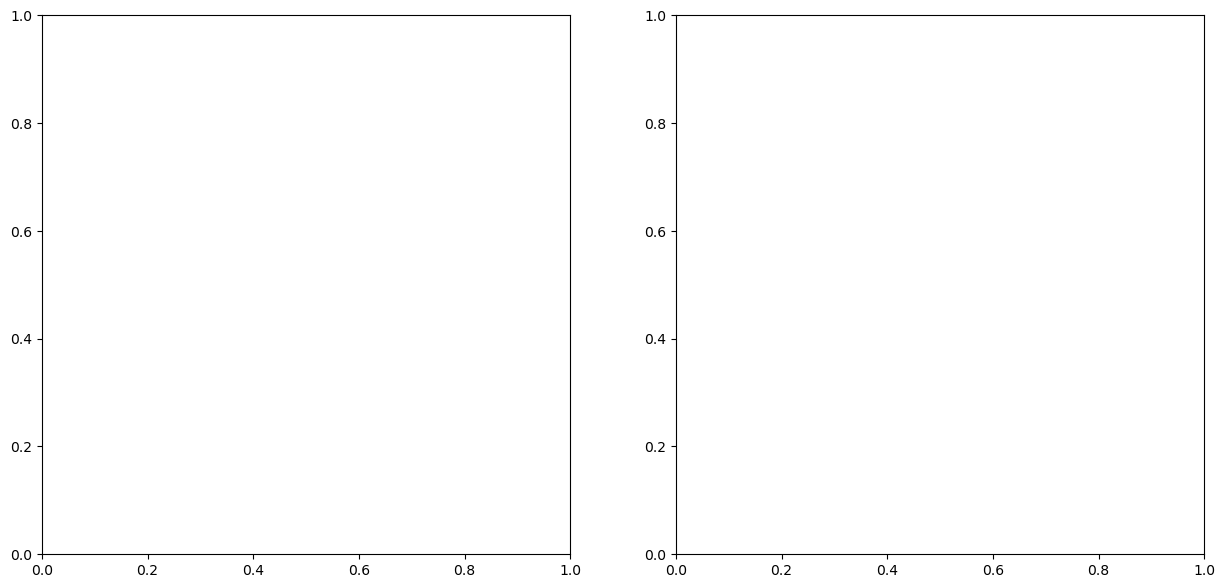

In [95]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

Histogram and kde

TypeError: 'int' object is not callable

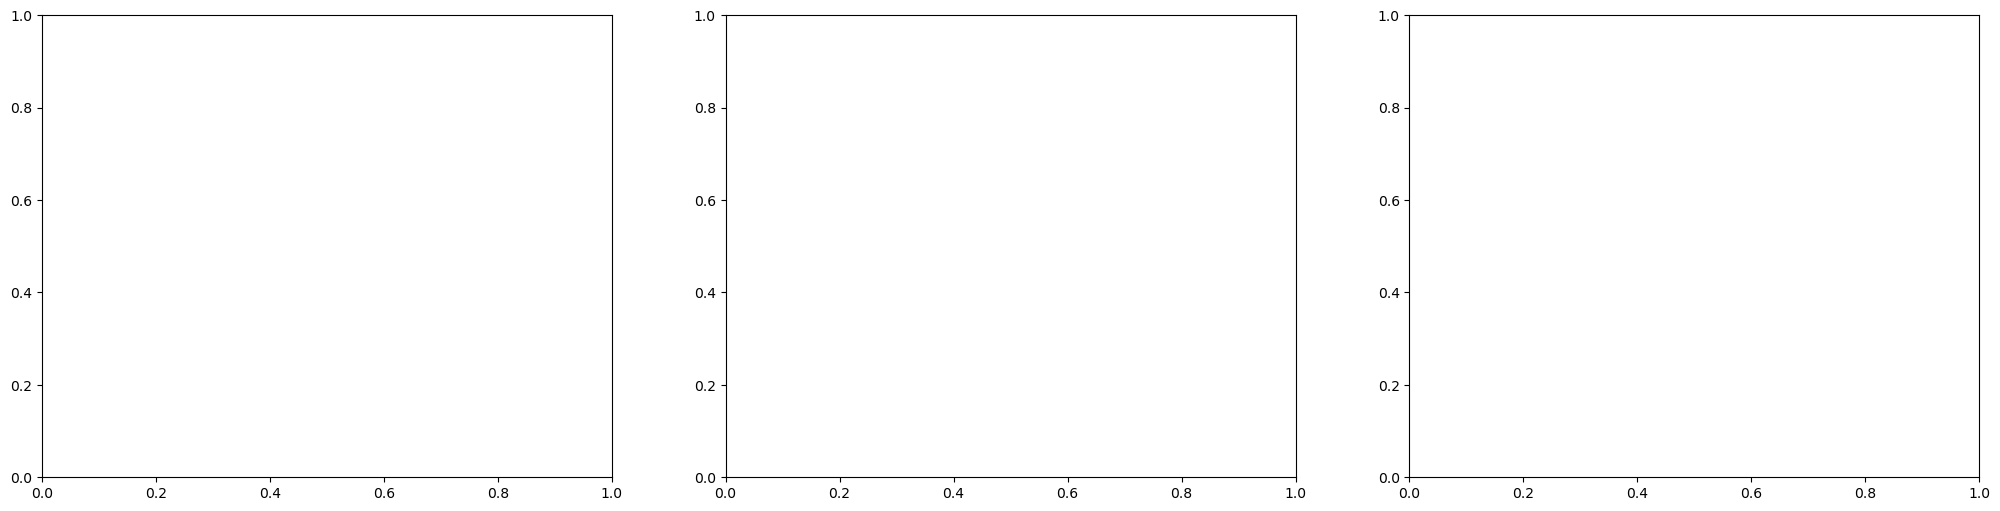

In [96]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.hisplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='launch')
plt.show()

INSIGHTS

#standard lunch helps peform well in exams
# standard lunch helps perform well in exams be it a male or female

TypeError: 'int' object is not callable

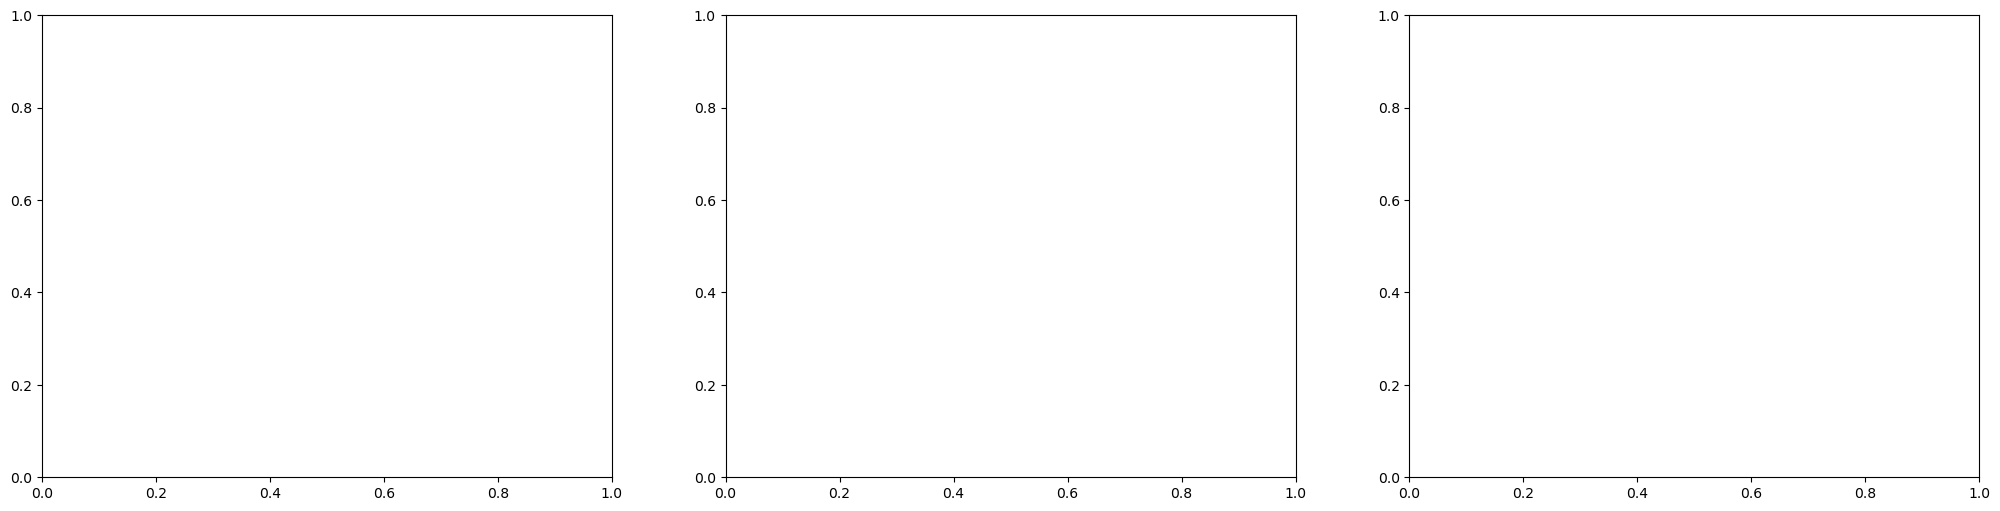

In [97]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

Insights

In general parent's education don't help student perform well in exam.

2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

3rd plot we can see there is no effect of parent's education on female students.

TypeError: 'int' object is not callable

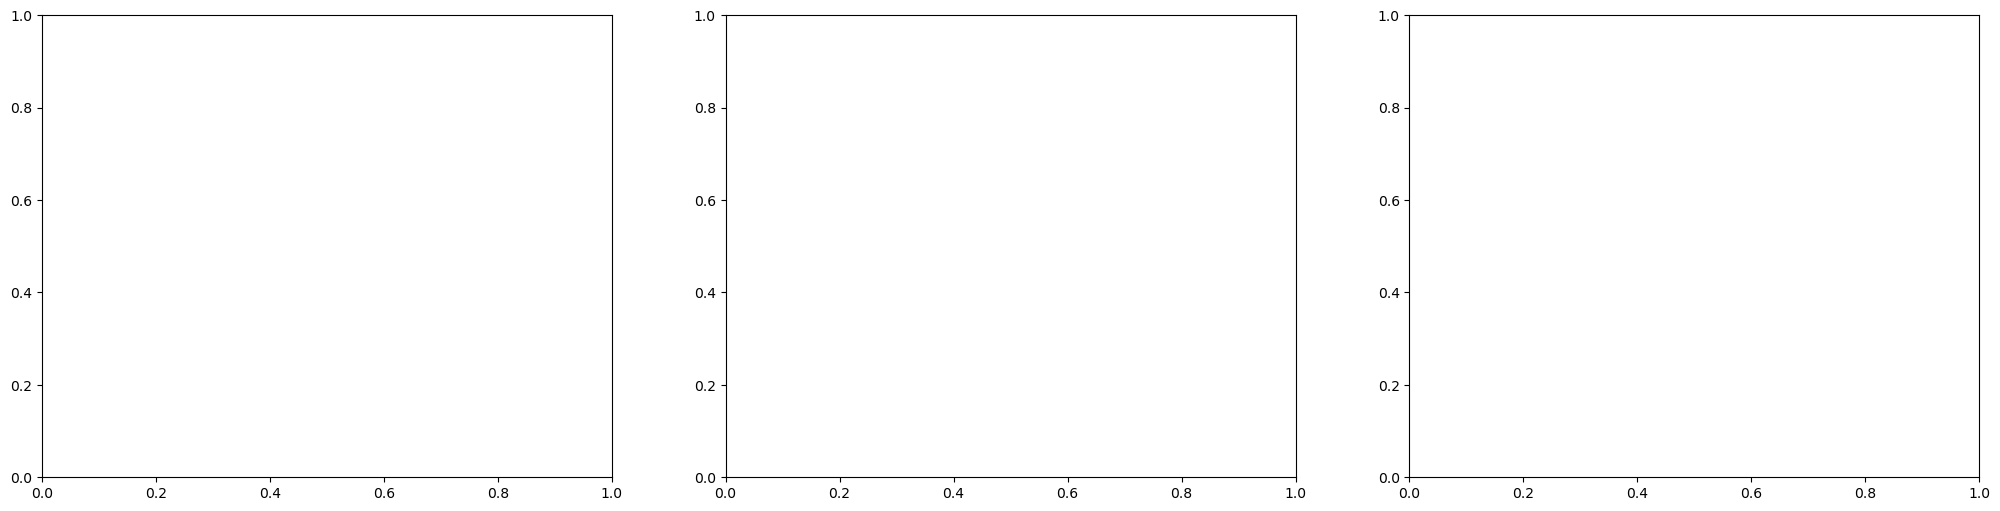

In [98]:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

Insights

Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

In [99]:
# Maximum score of students in all three subjects

plt.figure(figsize=(18,8))
plt.subplot(1,4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='rad',linwidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=f,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORE')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

TypeError: 'int' object is not callable

<Figure size 1800x800 with 0 Axes>

INSIGHTHS

# From the above three plots its clearly visible that most of the students score in between 60 -80 maths whereas in reading and writing 
 # most of them score from 50 -60

In [102]:
# Multivaiate analysis using pieplot

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size=df['gneder'].value_counts()
labels= 'female', 'male'
color= ['red','green']

plt.pie(size,colors=color,labels=labels,autopct= '.%2f%%')
plt,title('Gender',fontsize = 20)
plt.axis('off')


plt.subplot(1,5,2)
size = df['race/ethencity'].value_counts()
labels = 'Group C','Group D','Group B','group E','Group A'
color = ['red','green','blue','cyan','orange']

plt.pie(size,colors=color,lables=labels,autopct= '%2f%%')
plt.title('Race/Ethnicity',fontsize=20)
plt.axis('off')



plt.subplot(1,5,3)
size= df['launch'].value_counts()
labels= 'satandard','Free'
color = ['red','green']

plt.pie(size, colors=color,labels=labels,autopct= '.%2f%%')
plt.title('Lunch',fontsize =20)
plt.axis=(['off'])

plt.subplot(1,5,4)
size=df['test preparation course'].value_counts()
labels='None','completed'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct= '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['parental_level_of_education'].value_counts()
labels = 'some college',"Associative's Degree",'High school','some High school',"Bechelor's Degree","Master's Degree"
color= ['red', 'green','blue','cyan','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Parental Education',fontsize = 20)
plt.axis ('off')

plt.tight_layout()
plt.grid()

plt.show()




TypeError: 'int' object is not callable

INSIGHTS

Number of male and female students  is almost equal
Number of student are greates in group c
Number of studnets who have standard lunch are greater
Number of students who have not enrolled in any test prepration course is greater
Number of students whose parental education is"some college " is greater followed closely by "Associative's Degree'


Feature wise visalization

Gender column
How is distribution of gender?
is gender has any impact on students performance?


In [103]:
# UNIVARIATE ANALYSIS
f,ax=plt.subplot(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0,1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()



TypeError: 'int' object is not callable

INSIGHTS

Gender has balanced data with female students are 518(48%) and male students are 882 (52%)